# DVE EXAM 1656935 analyzing the medical cost of non smokers and non smokers.

# cleaning and description of data

question 1.1 

In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as mp
# Initialisation Cell
from __future__ import print_function, division
from IPython.display import display, HTML, Javascript
from matplotlib import pyplot as plt
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.utils import resample
from datetime import datetime
import calendar
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')
import matplotlib.gridspec as gridspec
import matplotlib


%matplotlib inline

sns.set_context("talk")
sns.set_style('darkgrid', {'figure.facecolor': '(0,0,0,0)'}) 
#'axes.facecolor': '(0,0,0,0)'

#Stacked and Horizontal Slides
horizontal = Javascript("""this.element.addClass('horizontal');""")
stacked = Javascript("""this.element.removeClass('horizontal');""")
set_horizontal = lambda: display(horizontal)
set_stacked = lambda: display(stacked)

In [2]:
data=pd.read_csv('insurance.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1353 non-null   int64  
 1   sex       1353 non-null   object 
 2   bmi       1353 non-null   float64
 3   children  1353 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1353 non-null   object 
 6   charges   1338 non-null   float64
 7   premium   1353 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 84.7+ KB


In [4]:
data.head(30)


,age,sex,bmi,children,smoker,region,charges,premium
0,19,female,27.900,0,yes,southwest,16884.92400,350
1,18,male,33.770,1,no,southeast,1725.55230,200
2,28,male,33.000,3,no,southeast,4449.46200,100
3,33,male,22.705,0,no,northwest,21984.47061,200
4,32,male,28.880,0,no,northwest,3866.85520,350
5,31,female,25.740,0,no,southeast,3756.62160,350
6,46,female,33.440,1,no,southeast,8240.58960,200
7,37,female,27.740,3,no,northwest,7281.50560,200
8,37,male,29.830,2,no,northeast,6406.41070,100
9,60,female,25.840,0,no,northwest,28923.13692,350


In [5]:
data['smoker'].unique()


array(['yes', 'no', nan], dtype=object)

In [6]:
data['children'].value_counts()

0    574
1    326
2    245
3    158
4     27
5     23
Name: children, dtype: int64

In [7]:
data["region"].unique()


array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [8]:
data["region"].value_counts()

southeast    369
northwest    329
northeast    329
southwest    326
Name: region, dtype: int64

In [9]:
data['sex'].value_counts()

male      680
female    673
Name: sex, dtype: int64

In [10]:
data['sex'].unique()

array(['female', 'male'], dtype=object)

In [11]:
data.describe(include='all')

#to describe the statistics for numerical variables, we present the five summary statistics. Range can be calculated as the difference between max and min .

,age,sex,bmi,children,smoker,region,charges,premium
count,1353.000000,1353,1353.000000,1353.000000,1338,1353,1338.000000,1353.000000
unique,NaN,2,NaN,NaN,2,4,NaN,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN,NaN
freq,NaN,680,NaN,NaN,1064,369,NaN,NaN
mean,39.157428,NaN,30.670080,1.118256,NaN,NaN,13270.422265,287.730968
std,14.021578,NaN,6.093331,1.229290,NaN,NaN,12110.011237,152.363854
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900,100.000000
25%,26.000000,NaN,26.290000,0.000000,NaN,NaN,4740.287150,100.000000
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000,350.000000
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16639.912515,500.000000


In [12]:
data.describe()

,age,bmi,children,charges,premium
count,1353.000000,1353.000000,1353.000000,1338.000000,1353.000000
mean,39.157428,30.670080,1.118256,13270.422265,287.730968
std,14.021578,6.093331,1.229290,12110.011237,152.363854
min,18.000000,15.960000,0.000000,1121.873900,100.000000
25%,26.000000,26.290000,0.000000,4740.287150,100.000000
50%,39.000000,30.400000,1.000000,9382.033000,350.000000
75%,51.000000,34.700000,2.000000,16639.912515,500.000000
max,64.000000,53.130000,5.000000,63770.428010,500.000000


In [13]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1348    False
1349    False
1350    False
1351    False
1352    False
Length: 1353, dtype: bool

In [14]:
#check missing values
data.isnull().sum()

age          0
sex          0
bmi          0
children     0
smoker      15
region       0
charges     15
premium      0
dtype: int64

In [15]:
percent_missing=data['smoker'].isnull()*100/len(data['smoker'])
percent_missing1=data['charges'].isnull()*100/len(data['charges'])


In [16]:
percent_missing

0       0.00000
1       0.00000
2       0.00000
3       0.00000
4       0.00000
         ...   
1348    0.07391
1349    0.07391
1350    0.07391
1351    0.07391
1352    0.07391
Name: smoker, Length: 1353, dtype: float64

In [17]:
percent_missing1

0       0.00000
1       0.00000
2       0.00000
3       0.00000
4       0.00000
         ...   
1348    0.07391
1349    0.07391
1350    0.07391
1351    0.07391
1352    0.07391
Name: charges, Length: 1353, dtype: float64

we are going to drop the missing values since the percentage missing is  less than 3%, we could say the missing values are missing completely at random so we are going to drop all the missing raw entriesn

In [18]:
data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges,premium
count,1353.000000,1353,1353.000000,1353.000000,1338,1353,1338.000000,1353.000000
unique,NaN,2,NaN,NaN,2,4,NaN,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN,NaN
freq,NaN,680,NaN,NaN,1064,369,NaN,NaN
mean,39.157428,NaN,30.670080,1.118256,NaN,NaN,13270.422265,287.730968
std,14.021578,NaN,6.093331,1.229290,NaN,NaN,12110.011237,152.363854
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900,100.000000
25%,26.000000,NaN,26.290000,0.000000,NaN,NaN,4740.287150,100.000000
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000,350.000000
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16639.912515,500.000000


In [19]:
data=data.dropna()

In [20]:
data

,age,sex,bmi,children,smoker,region,charges,premium
0,19,female,27.900,0,yes,southwest,16884.92400,350
1,18,male,33.770,1,no,southeast,1725.55230,200
2,28,male,33.000,3,no,southeast,4449.46200,100
3,33,male,22.705,0,no,northwest,21984.47061,200
4,32,male,28.880,0,no,northwest,3866.85520,350
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,350
1334,18,female,31.920,0,no,northeast,2205.98080,500
1335,18,female,36.850,0,no,southeast,1629.83350,200
1336,21,female,25.800,0,no,southwest,2007.94500,100


In [21]:
from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(data.sex.drop_duplicates()) 
data.sex = le.transform(data.sex)
# smoker or not
le.fit(data.smoker.drop_duplicates()) 
data.smoker = le.transform(data.smoker)
#region
le.fit(data.region.drop_duplicates()) 
data.region = le.transform(data.region)

In [22]:
data['age_bin']=pd.cut(data.age.astype(int),5)


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   int32   
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   int32   
 5   region    1338 non-null   int32   
 6   charges   1338 non-null   float64 
 7   premium   1338 non-null   int64   
 8   age_bin   1338 non-null   category
dtypes: category(1), float64(2), int32(3), int64(3)
memory usage: 80.0 KB


# DATA EXPLORATORY ANALYSIS

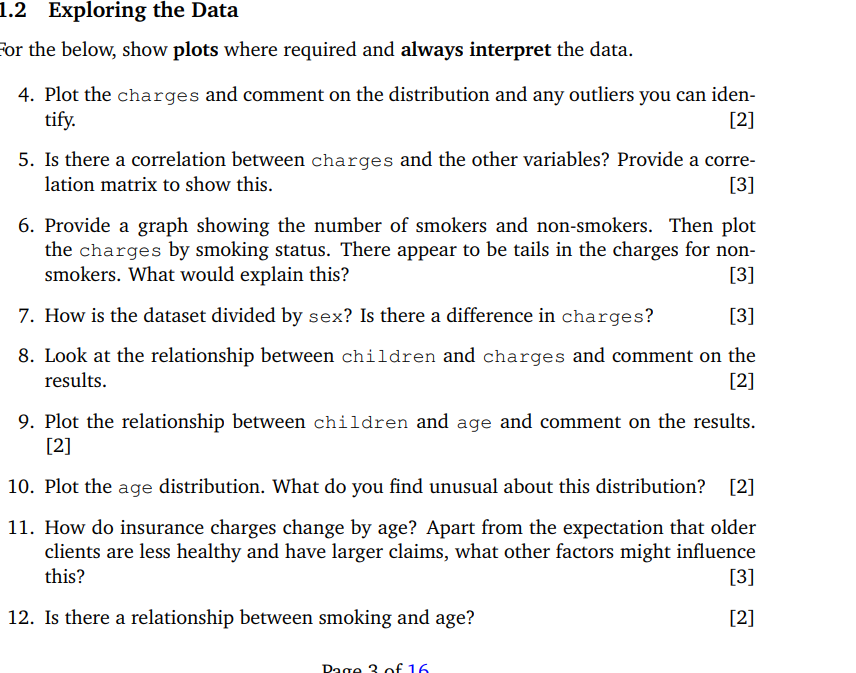

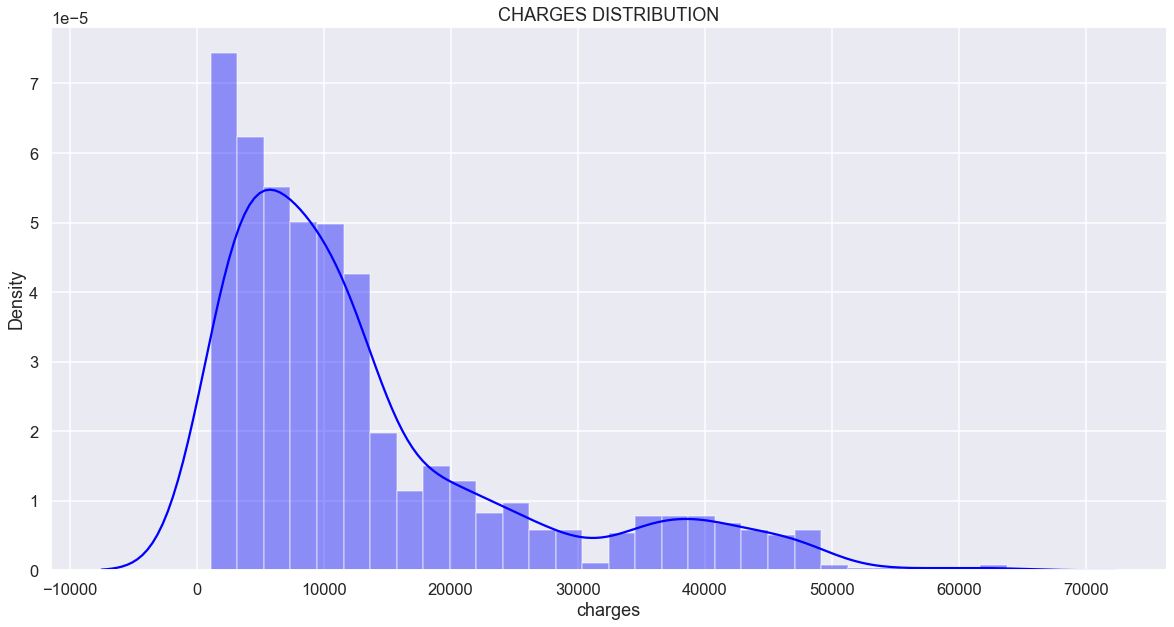

In [24]:
#charges distribution

plt.figure(figsize = (20,10))
sns.distplot(data['charges'], color='blue', hist= True)
plt.title('CHARGES DISTRIBUTION')
plt.show()


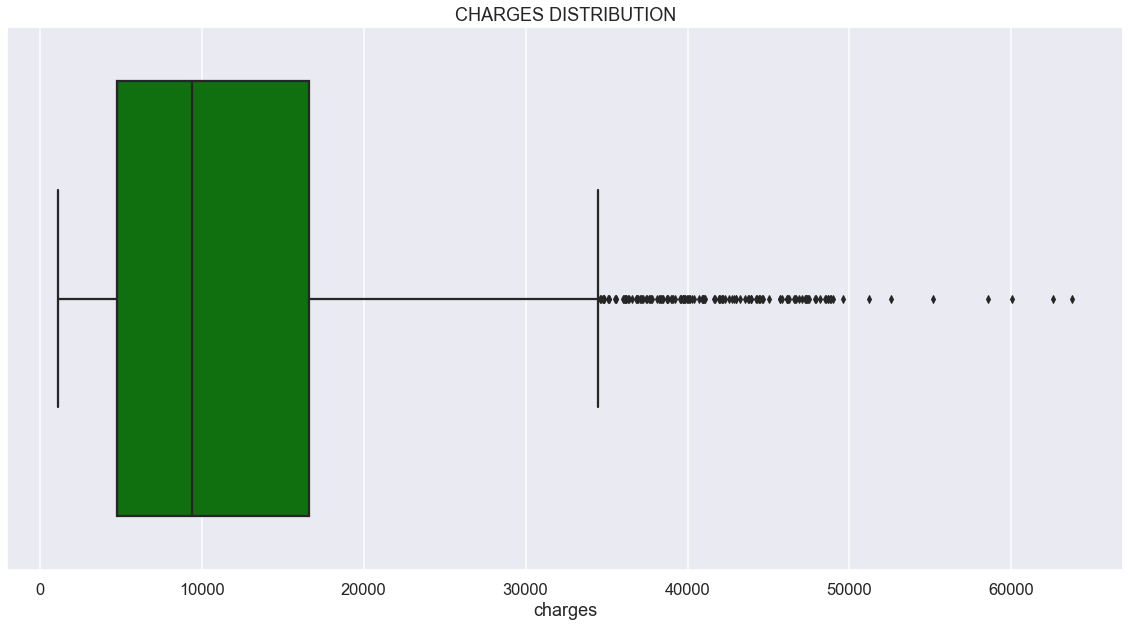

In [25]:
plt.figure(figsize = (20,10))
sns.boxplot(data['charges'],color='green')
plt.title('CHARGES DISTRIBUTION')
plt.show()

In [26]:
Q1=np.percentile(data.charges,25)
Q3=np.percentile(data.charges,75)
IQr=Q3-Q1

uppperlimit= Q3+1.5*IQr
lowerlimit= Q1-1.5*IQr
print({'first quartile':Q1})

{'first quartile': 4740.28715}


In [27]:
uppperlimit 

34489.350562499996

We see outliers with charges greater than 34489.3505....  

In [28]:
outliers= data.charges[(data.charges>uppperlimit)|(data.charges<lowerlimit)]
outliers.unique()

array([39611.7577 , 36837.467  , 37701.8768 , 38711.     , 35585.576  ,
       51194.55914, 39774.2763 , 48173.361  , 38709.176  , 37742.5757 ,
       47496.49445, 37165.1638 , 39836.519  , 43578.9394 , 47291.055  ,
       47055.5321 , 39556.4945 , 40720.55105, 36950.2567 , 36149.4835 ,
       48824.45   , 43753.33705, 37133.8982 , 34779.615  , 38511.6283 ,
       35160.13457, 47305.305  , 44260.7499 , 41097.16175, 43921.1837 ,
       36219.40545, 46151.1245 , 42856.838  , 48549.17835, 47896.79135,
       42112.2356 , 38746.3551 , 42124.5153 , 34838.873  , 35491.64   ,
       42760.5022 , 47928.03   , 48517.56315, 41919.097  , 36085.219  ,
       38126.2465 , 42303.69215, 46889.2612 , 46599.1084 , 39125.33225,
       37079.372  , 35147.52848, 48885.13561, 36197.699  , 38245.59327,
       48675.5177 , 63770.42801, 45863.205  , 39983.42595, 45702.02235,
       58571.07448, 43943.8761 , 39241.442  , 42969.8527 , 40182.246  ,
       34617.84065, 42983.4585 , 42560.4304 , 40003.33225, 45710

In [29]:
(data.charges<lowerlimit)

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Name: charges, Length: 1338, dtype: bool

any amount greater that the upper limit is considered as an outlier based on the interquartile range method, setting up the upper limit  and considering all values above that we identify them as outliers

# CORRELATION MATRIX 

In [30]:
data.corr()['charges']

age         0.299008
sex         0.057292
bmi         0.198341
children    0.067998
smoker      0.787251
region     -0.006208
charges     1.000000
premium     0.028325
Name: charges, dtype: float64

<AxesSubplot:title={'center':'Correlation matrix'}>

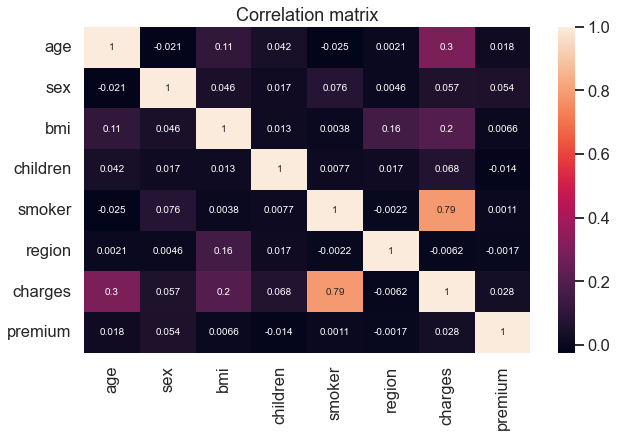

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt 

%matplotlib inline

#correlation matrix
corr=data.corr()
plt.figure(figsize=(10,6))
plt.title('Correlation matrix')
sns.heatmap(corr,annot = True)

# question 6
Provide a graph showing the number of smokers and non-smokers. Then plot
the charges by smoking status. There appear to be tails in the charges for nonsmokers. What would explain this?

Text(0.5, 1.0, 'Non smokers vs Smokers  ')

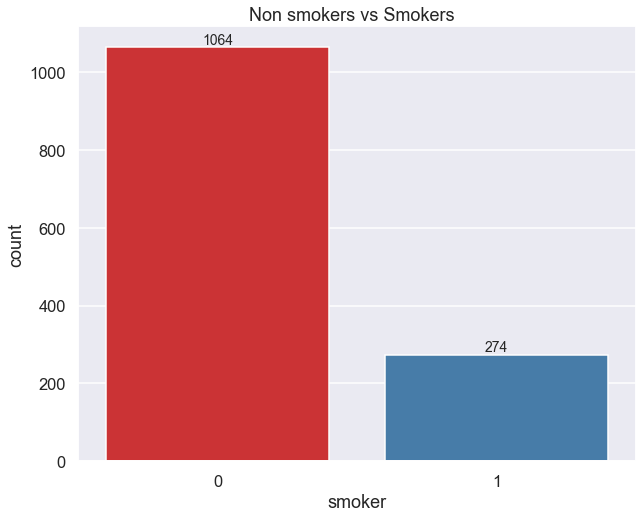

In [32]:
plt.figure(figsize=(10,8))
fig=sns.countplot(data['smoker'], palette="Set1")
fig.bar_label(fig.containers[0],fontsize=14)
plt.title('Non smokers vs Smokers  ')

Text(0.5, 1.0, 'smokers v non smokers charge distrubution ')

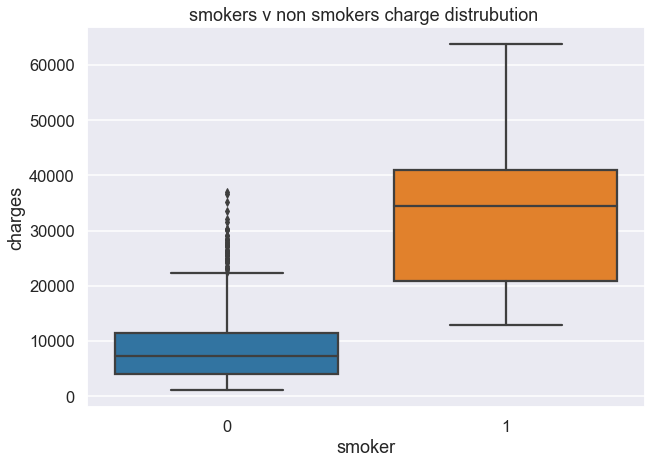

In [33]:
plt.figure(figsize=(10,7))
sns.boxplot(x='smoker', y='charges', data=data)
plt.title('smokers v non smokers charge distrubution ')


Text(0.5, 1.0, 'charge distribution by smoking status ')

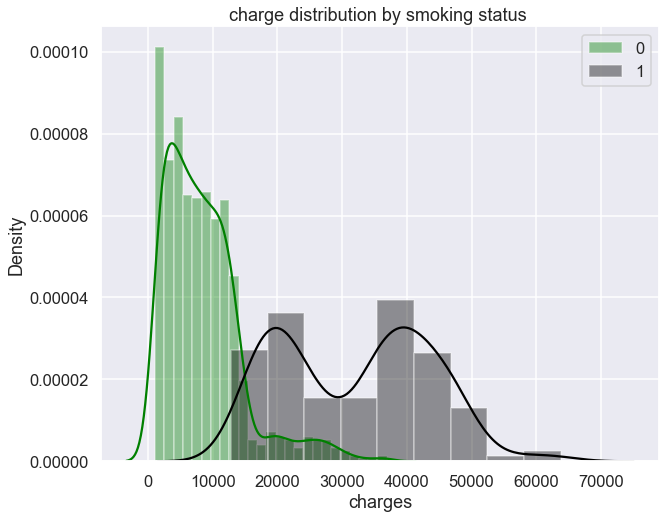

In [34]:
plt.figure(figsize=(10,8))
sns.distplot(data[(data.smoker==0)]['charges'] ,hist=True ,color ='green',label=0)
sns.distplot(data[(data.smoker==1)]['charges'] ,hist=True, color ='black',label=1)
plt.legend()
plt.title('charge distribution by smoking status ')

# smokers are more likey to be unhealthy!!!!!! Hence more charges for smokers


# question 7

Text(0.5, 1.0, 'sex Distribution')

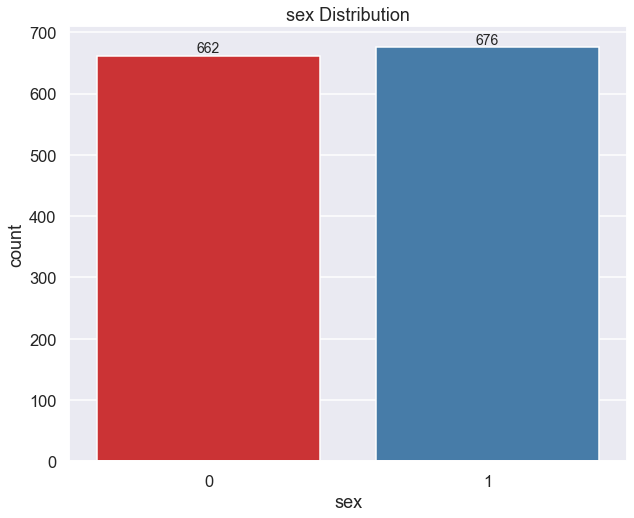

In [35]:
plt.figure(figsize=(10,8))
fig=sns.countplot(data['sex'], palette="Set1")
fig.bar_label(fig.containers[0],fontsize=14)
plt.title('sex Distribution')

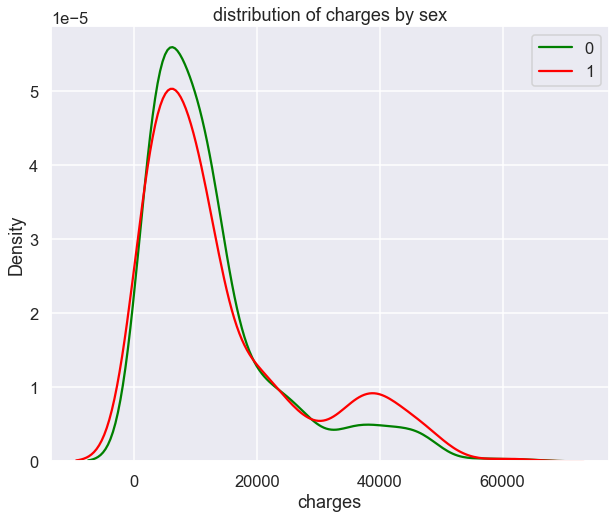

In [36]:
plt.figure(figsize=(10,8))
sns.distplot(data[(data.sex==0)]['charges'] ,hist=False, color ='green',label=0)
sns.distplot(data[(data.sex==1)]['charges'],hist=False, color ='Red',label=1)
plt.title('distribution of charges by sex')
plt.legend()

Text(0.5, 1.0, 'charges by sex ')

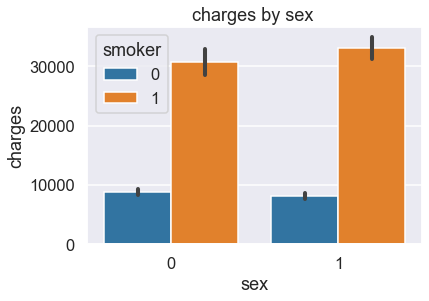

In [37]:
# plt.figure(figsize=(10,7))
sns.barplot(x='sex',y='charges', hue='smoker' ,data=data)
plt.title('charges by sex ')

# we see that females are charged less compared to males for insurance, we see that clearly when the males cover a greater area under the distrubution curve

Text(0.5, 1.0, 'charges by sex ')

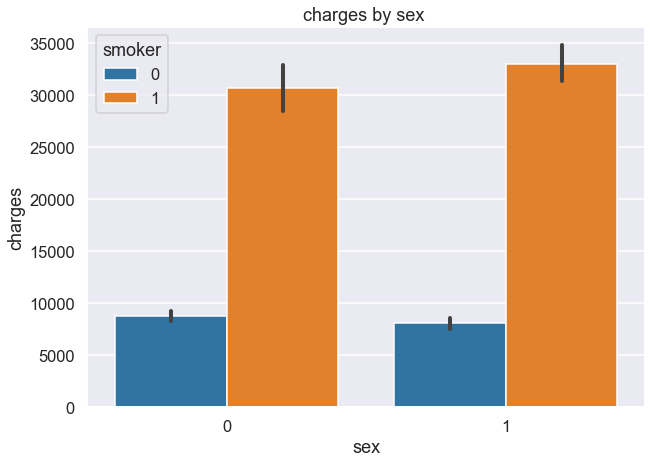

In [38]:
plt.figure(figsize=(10,7))
sns.barplot(x='sex',y='charges', hue='smoker' ,data=data)
plt.title('charges by sex ')

# we see that females will spend less on insurance and males will spend more in insurance , we see outliers in males spending more than 40000 ,where else in females they will spend roughly above 29000.this could be possibly because they are smoking 

question 8

Text(0.5, 1.0, 'charges by number of children ')

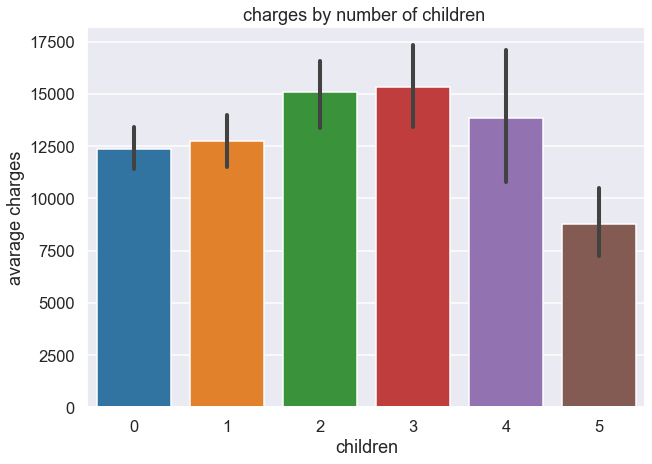

In [39]:
plt.figure(figsize=(10,7))
sns.barplot(x='children',y='charges',data=data)
plt.ylabel('avarage charges')
plt.title('charges by number of children ')

In [40]:
# from the above finding we that having more children simply means more charges,

# we then plot to see if you are a smoker and having children , what are your charges going to look like??

Text(0.5, 1.0, 'charges by number of children ')

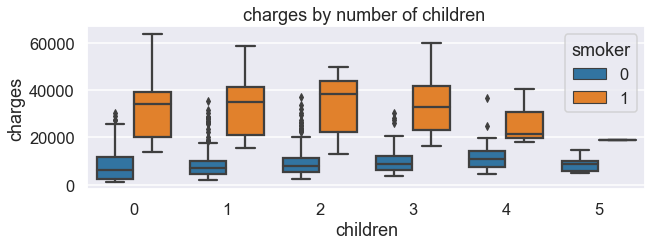

In [41]:
plt.figure(figsize=(10,3))
sns.boxplot(x='children',y='charges', hue='smoker',data=data)
plt.title('charges by number of children ')

Text(0.5, 1.0, 'charges distribution by number of children')

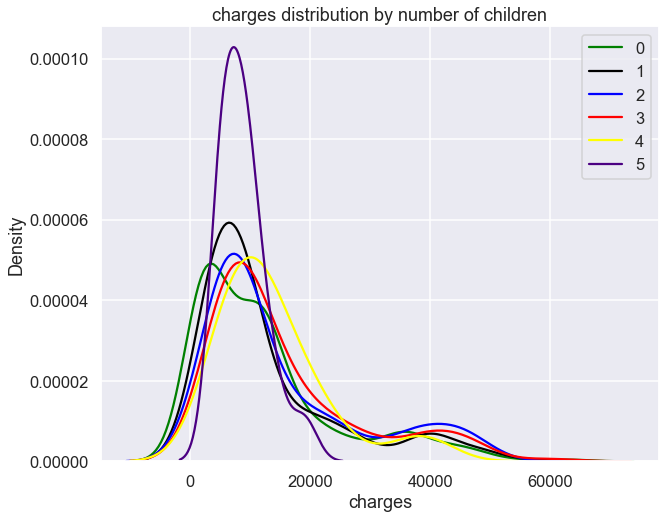

In [42]:
plt.figure(figsize=(10,8))
sns.distplot(data[(data.children==0)]['charges'] ,hist=False, color ='g',label=0)
sns.distplot(data[(data.children==1)]['charges'] ,hist=False, color ='black',label=1)
sns.distplot(data[(data.children==2)]['charges'] ,hist=False, color ='blue',label=2)
sns.distplot(data[(data.children==3)]['charges'] ,hist=False, color ='red',label=3)
sns.distplot(data[(data.children==4)]['charges'] ,hist=False, color ='yellow',label=4)
sns.distplot(data[(data.children==5)]['charges'] ,hist=False, color ='indigo',label=5)
plt.legend( )
plt.title('charges distribution by number of children')



Text(0.5, 1.0, 'relationship between children and age')

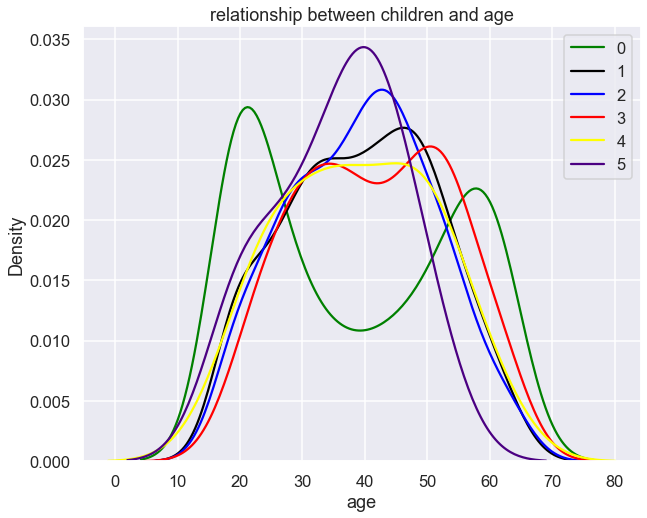

In [43]:
#question 9
plt.figure(figsize=(10,8))
sns.distplot(data[(data.children==0)]['age'] ,hist=False, color ='g',label=0)
sns.distplot(data[(data.children==1)]['age'] ,hist=False, color ='black',label=1)
sns.distplot(data[(data.children==2)]['age'] ,hist=False, color ='blue',label=2)
sns.distplot(data[(data.children==3)]['age'] ,hist=False, color ='red',label=3)
sns.distplot(data[(data.children==4)]['age'] ,hist=False, color ='yellow',label=4)
sns.distplot(data[(data.children==5)]['age'] ,hist=False, color ='indigo',label=5)
plt.legend( )
plt.title('relationship between children and age')

Question 10 AGE DISTRIBUTION

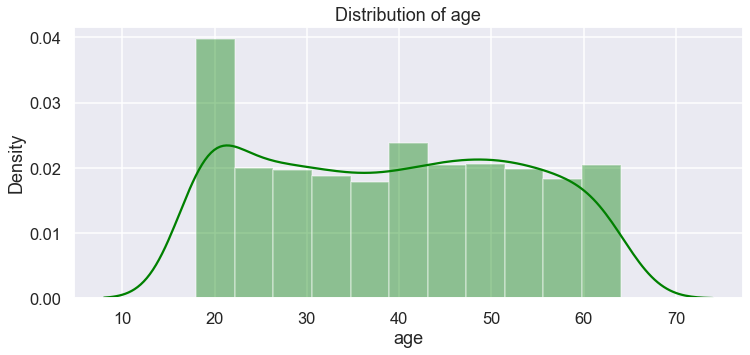

In [44]:
plt.figure(figsize=(12,5))
plt.title("Distribution of age")
ax = sns.distplot(data["age"], color = 'g')

In [45]:


# we see more clients aged betweeen  (18-20), which is not usual because most people around this age group are not working and are without medical aids

question 11

Text(0.5, 0, 'AGE_bin')

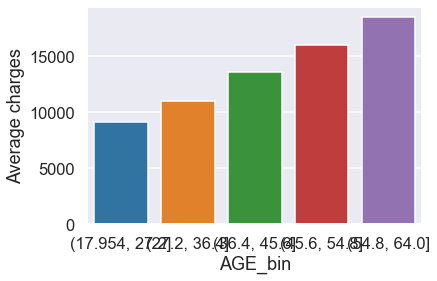

In [46]:
# Let's bin the ages
data['age_bin'] = pd.cut(data.age.astype(int), 5)
data.head()

data_age_bin = data.groupby('age_bin').charges.mean()
sns.barplot(x=data_age_bin.index, y=data_age_bin.values, )
plt.ylabel('Average charges')
plt.xlabel('AGE_bin')

the hiher the age the more likely you are to be charged higher, obesity could be the other factor